# A few tips to get started with homework 7

In [121]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

### Problem 1

In [32]:
ds = xr.open_dataset('../../data/sst50n145w_hr_v3.cdf')
ds

<xarray.Dataset>
Dimensions:  (depth: 1, lat: 1, lon: 1, time: 69819)
Coordinates:
  * time     (time) datetime64[ns] 2009-06-13T21:00:00 ... 2017-05-31T23:00:00
  * depth    (depth) float32 1.0
  * lat      (lat) float32 50.1
  * lon      (lon) float32 215.1
Data variables:
    T_25     (time, depth, lat, lon) float32 ...
    QT_5025  (time, depth, lat, lon) float32 ...
    ST_6025  (time, depth, lat, lon) float32 ...
Attributes:
    Data_Source:    OCS Project Office/NOAA/PMEL
    OCS:            Dr. Meghan F. Cronin: Meghan.F.Cronin@noaa.gov
    File_info:      Contact: Dai.C.McClurg@noaa.gov
    missing_value:  1e+35
    _FillValue:     1e+35
    CREATION_DATE:  15:52 15-NOV-2020

In [56]:
# some one asked about how to the rid of the extra dimenssions
temp = ds.T_25.squeeze()
temp

<xarray.DataArray 'T_25' (time: 69819)>
array([9.599 , 9.647 , 9.691 , ..., 9.0186, 9.2515, 9.5066], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2009-06-13T21:00:00 ... 2017-05-31T23:00:00
    depth    float32 1.0
    lat      float32 50.1
    lon      float32 215.1
Attributes:
    name:            T
    long_name:       SST (C)
    generic_name:    temp
    FORTRAN_format:   
    units:           C
    epic_code:       25

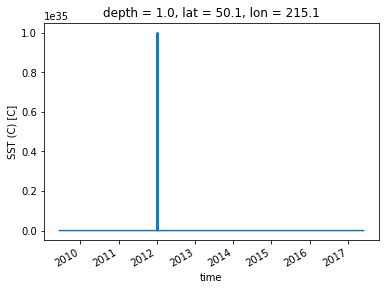

In [57]:
temp.plot()

In [60]:
np.where(temp==ds._FillValue)

(array([22459, 22460, 22461, 22600, 22601, 22602]),)

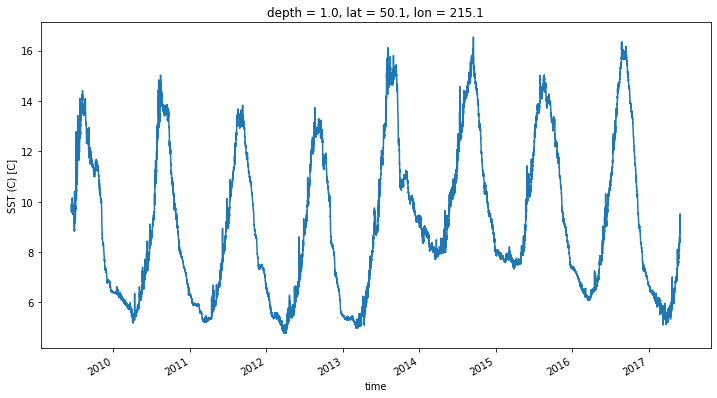

In [78]:
temp[temp==ds._FillValue] = np.nan
plt.figure(figsize=(12, 6))
temp.plot()

In [79]:
temp_interp = temp.dropna('time')
temp_interp = temp_interp.interp(time=temp.time) # linear interpolation in the time dimension

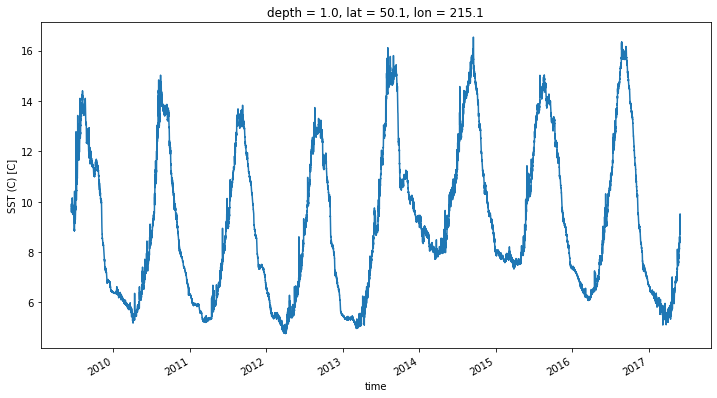

In [81]:
plt.figure(figsize=(12, 6))
temp_interp.plot()

In [ ]:
# Quick check on the interpolation

In [101]:
ind = np.nonzero(np.isnan(temp.values)) # Indices where temp is NaN
ind
print(temp.values[ind])

[nan nan nan nan nan nan]


In [102]:
temp_interp.values[ind]

array([6.4295001 , 6.42600012, 6.42250013, 6.35249996, 6.35500002,
       6.35750008])

### Problem 2

You probably have enough material from previous notes to figure this one out.

### Problem 3

In [117]:
from scipy import signal

In [116]:
temp_use = temp_interp[:-1].values # just so we have an even number of points
temp_use.shape

(69818,)

!!!!WARNING!!!! Sarah's example during class (see Zoom recording) shifted the filtered amplitudes by 6 points (11+1)/N to correct for the shift that the filtering function does. You should apply that correction to you homework too. See the example figure in the the scipy docummentation https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html

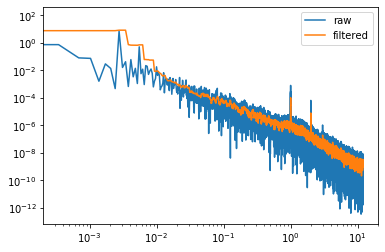

In [126]:
N = len(temp_use)
fft_temp = np.fft.fft(temp_use)
amp = abs(fft_temp[:N//2+1]/N)**2 # we only get the positive frequencies (half the energy)
amp[1:-1] = 2*amp[1:-1]
pt = 11
amp_boxcar = signal.lfilter(signal.boxcar(pt)/pt, 1, amp)
freq = np.fft.rfftfreq(N, 1/24)

plt.loglog(freq, amp, label='raw')
plt.loglog(freq, amp_boxcar, label='filtered')
plt.legend()

### Problem 4

You should also have enough material in the lecture notes to figure this one out. In particular, I have written a function to compute the autocorrelation in lecture 12.